In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Loan_Data/loan_train.csv")

In [3]:
df.Gender.fillna(value='other', axis=0, inplace=True)

In [4]:
df.isnull().sum()

Unnamed: 0            0
Loan_ID               0
Gender                0
Married               1
Dependents            9
Education             0
Self_Employed        29
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           16
Loan_Amount_Term     13
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
df.Married.fillna(value='Yes', axis=0, inplace=True)

In [6]:
df.isnull().sum()

Unnamed: 0            0
Loan_ID               0
Gender                0
Married               0
Dependents            9
Education             0
Self_Employed        29
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           16
Loan_Amount_Term     13
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df.Gender.value_counts()

Male      393
Female     88
other      10
Name: Gender, dtype: int64

In [8]:
#print the unique values in the object variables
print('Married: ' + str(df['Married'].unique()))
print('Dependents: '+ str(df['Dependents'].unique()))
print('Education: '+ str(df['Education'].unique()))
print('Self_Employed: '+ str(df['Self_Employed'].unique()))
print('Property_Area: '+ str(df['Property_Area'].unique()))

Married: ['No' 'Yes']
Dependents: ['0' '3+' '2' '1' nan]
Education: ['Graduate' 'Not Graduate']
Self_Employed: ['No' 'Yes' nan]
Property_Area: ['Semiurban' 'Rural' 'Urban']


In [9]:
Approved = df[df['Loan_Status']==1]['Loan_Status'].count()
Rejected = df[df['Loan_Status']==0]['Loan_Status'].count()

In [10]:
status = pd.DataFrame([Approved,Rejected])

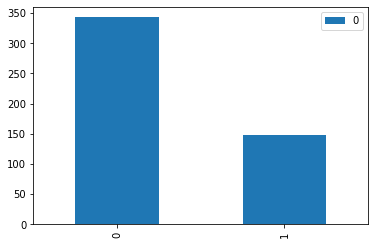

In [11]:
status.plot(kind='bar')

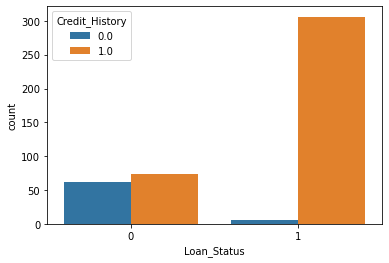

In [12]:
sns.countplot(df['Loan_Status'], hue=df['Credit_History'])

In [13]:
df['Credit_History'] = df.Credit_History.fillna(1)

In [14]:
df.isnull().sum()

Unnamed: 0            0
Loan_ID               0
Gender                0
Married               0
Dependents            9
Education             0
Self_Employed        29
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           16
Loan_Amount_Term     13
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

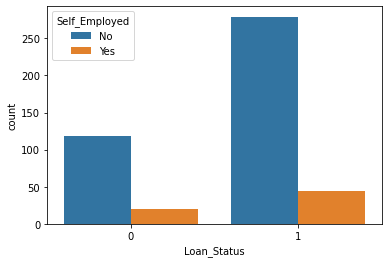

In [15]:
sns.countplot(df['Loan_Status'], hue=df['Self_Employed'])

In [16]:
df['Self_Employed'] = df['Self_Employed'].fillna('No')

In [17]:
df.isnull().sum()

Unnamed: 0            0
Loan_ID               0
Gender                0
Married               0
Dependents            9
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           16
Loan_Amount_Term     13
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
mean = df.LoanAmount.mean()

In [19]:
df['LoanAmount'].fillna(value=mean, axis=0, inplace=True)

In [20]:
df.isnull().sum()

Unnamed: 0            0
Loan_ID               0
Gender                0
Married               0
Dependents            9
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     13
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [21]:
df.dropna(inplace=True)

In [22]:
df.isnull().sum()

Unnamed: 0           0
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [23]:
df.shape

(470, 14)

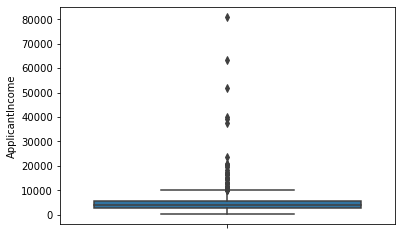

In [24]:
sns.boxplot(y='ApplicantIncome', data=df)

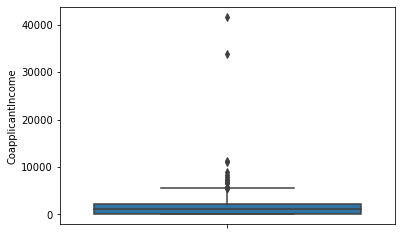

In [25]:
sns.boxplot(y='CoapplicantIncome', data=df)

In [26]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

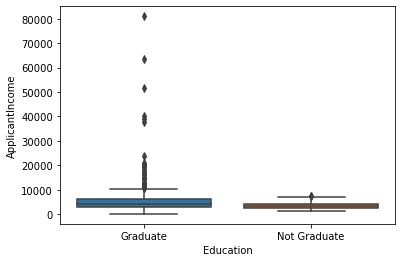

In [27]:
sns.boxplot(x='Education', y='ApplicantIncome', data=df)

In [28]:
df['Married'] = np.where((df['Married'] == 'Yes'), 1, 0)
df['Gender'] = np.where((df['Gender'] == 'Female'), 1, 0)
df['Education'] = np.where((df['Education'] == 'Graduate'), 1, 0)
df['Self_Employed'] = np.where((df['Self_Employed'] == 'Yes'), 1, 0)
df['Dependents'] = np.where((df['Dependents'] == '0'), 0, 1)

In [29]:
df.head(10)

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,0,LP002305,1,0,0,1,0,4547,0.0,115.0,360.0,1.0,Semiurban,1,4547.0
1,1,LP001715,0,1,1,0,1,5703,0.0,130.0,360.0,1.0,Rural,1,5703.0
2,2,LP002086,1,1,0,1,0,4333,2451.0,110.0,360.0,1.0,Urban,0,6784.0
4,4,LP002529,0,1,1,1,0,6700,1750.0,230.0,300.0,1.0,Semiurban,1,8450.0
5,5,LP001603,0,1,0,0,1,4344,736.0,87.0,360.0,1.0,Semiurban,0,5080.0
6,6,LP001273,0,1,0,1,0,6000,2250.0,265.0,360.0,1.0,Semiurban,0,8250.0
7,7,LP002706,0,1,1,0,0,5285,1430.0,161.0,360.0,0.0,Semiurban,1,6715.0
8,8,LP001859,0,1,0,1,0,14683,2100.0,304.0,360.0,1.0,Rural,0,16783.0
9,9,LP001228,0,0,0,0,0,3200,2254.0,126.0,180.0,0.0,Urban,0,5454.0
10,10,LP001608,0,1,1,1,0,2045,1619.0,101.0,360.0,1.0,Rural,1,3664.0


In [30]:
df.drop(['Unnamed: 0','Loan_ID'], axis=1, inplace=True)

In [31]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,1,0,0,1,0,4547,0.0,115.0,360.0,1.0,Semiurban,1,4547.0
1,0,1,1,0,1,5703,0.0,130.0,360.0,1.0,Rural,1,5703.0
2,1,1,0,1,0,4333,2451.0,110.0,360.0,1.0,Urban,0,6784.0
4,0,1,1,1,0,6700,1750.0,230.0,300.0,1.0,Semiurban,1,8450.0
5,0,1,0,0,1,4344,736.0,87.0,360.0,1.0,Semiurban,0,5080.0


In [32]:
dummies = pd.get_dummies(df.Property_Area)

In [33]:
df = pd.concat([df, dummies], axis=1)

In [34]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,Rural,Semiurban,Urban
0,1,0,0,1,0,4547,0.0,115.0,360.0,1.0,Semiurban,1,4547.0,0,1,0
1,0,1,1,0,1,5703,0.0,130.0,360.0,1.0,Rural,1,5703.0,1,0,0
2,1,1,0,1,0,4333,2451.0,110.0,360.0,1.0,Urban,0,6784.0,0,0,1
4,0,1,1,1,0,6700,1750.0,230.0,300.0,1.0,Semiurban,1,8450.0,0,1,0
5,0,1,0,0,1,4344,736.0,87.0,360.0,1.0,Semiurban,0,5080.0,0,1,0


In [35]:
df.drop(['Property_Area'], axis=1, inplace=True)

In [36]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,TotalIncome,Rural,Semiurban,Urban
0,1,0,0,1,0,4547,0.0,115.0,360.0,1.0,1,4547.0,0,1,0
1,0,1,1,0,1,5703,0.0,130.0,360.0,1.0,1,5703.0,1,0,0
2,1,1,0,1,0,4333,2451.0,110.0,360.0,1.0,0,6784.0,0,0,1
4,0,1,1,1,0,6700,1750.0,230.0,300.0,1.0,1,8450.0,0,1,0
5,0,1,0,0,1,4344,736.0,87.0,360.0,1.0,0,5080.0,0,1,0


In [37]:
X = df.drop(['Loan_Status'], axis=1)


In [38]:
Y = df['Loan_Status']

In [115]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome,Rural,Semiurban,Urban
0,1,0,0,1,0,4547,0.0,115.0,360.0,1.0,4547.0,0,1,0
1,0,1,1,0,1,5703,0.0,130.0,360.0,1.0,5703.0,1,0,0
2,1,1,0,1,0,4333,2451.0,110.0,360.0,1.0,6784.0,0,0,1
3,0,1,1,1,0,6700,1750.0,230.0,300.0,1.0,8450.0,0,1,0
4,0,1,0,0,1,4344,736.0,87.0,360.0,1.0,5080.0,0,1,0


In [39]:
X.shape

(470, 14)

In [40]:
Y.shape

(470,)

In [41]:
from sklearn.feature_selection import SelectKBest, chi2

In [44]:
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X, Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)


In [57]:
featuresScores = pd.concat([dfcolumns, dfscores], axis=1)
featuresScores.columns = ['Name of column','Score']
print(featuresScores.nlargest(14, 'Score'))

       Name of column        Score
6   CoapplicantIncome  9794.999775
10        TotalIncome  2308.331981
7          LoanAmount    21.527211
9      Credit_History    14.764417
12          Semiurban     4.671598
11              Rural     4.342824
1             Married     2.710774
0              Gender     2.408929
5     ApplicantIncome     1.247772
3           Education     0.446326
4       Self_Employed     0.214377
8    Loan_Amount_Term     0.116315
13              Urban     0.109082
2          Dependents     0.010505


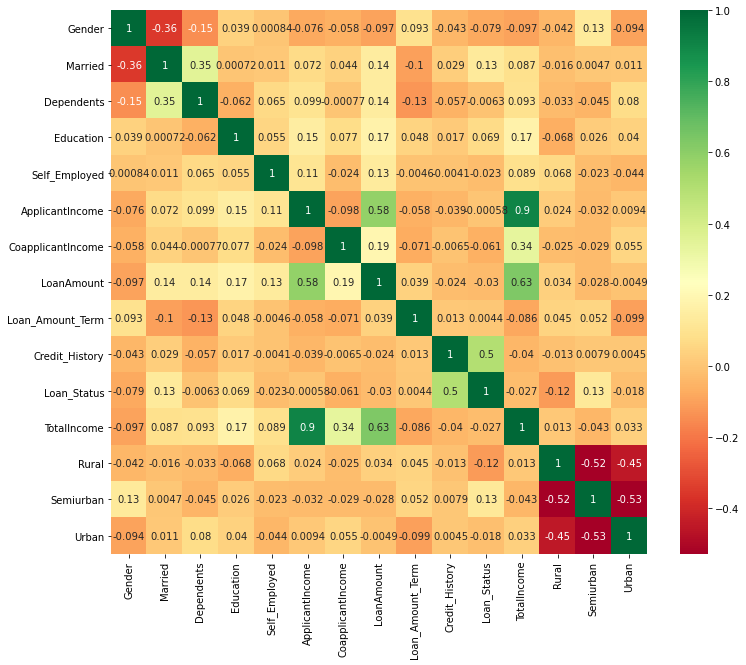

In [58]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')

In [59]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
X, Y = sm.fit_sample(X, Y)

In [60]:
Y.value_counts()

1    331
0    331
Name: Loan_Status, dtype: int64

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=3)

In [62]:
X_train.shape, X_test.shape

((463, 14), (199, 14))

In [64]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [65]:
log.fit(X_train, Y_train)

LogisticRegression()

In [66]:
log.score(X_train,Y_train)

0.8272138228941684

In [67]:
pred = log.predict(X_test)

In [68]:
accuracy_score(Y_test, pred)

0.8542713567839196

In [70]:
from sklearn.metrics import confusion_matrix

In [71]:
confusion_matrix(Y_test, pred)

array([[ 69,  21],
       [  8, 101]], dtype=int64)

In [72]:
from sklearn import metrics

In [73]:
metrics.f1_score(Y_test, pred)

0.8744588744588746

In [75]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.77      0.83        90
           1       0.83      0.93      0.87       109

    accuracy                           0.85       199
   macro avg       0.86      0.85      0.85       199
weighted avg       0.86      0.85      0.85       199



In [78]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Loan_Data/loan_test.csv')

In [79]:
test_data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001116,Male,No,0,Not Graduate,No,3748,1668.0,110.0,360.0,1.0,Semiurban
1,LP001488,Male,Yes,3+,Graduate,No,4000,7750.0,290.0,360.0,1.0,Semiurban
2,LP002138,Male,Yes,0,Graduate,No,2625,6250.0,187.0,360.0,1.0,Rural
3,LP002284,Male,No,0,Not Graduate,No,3902,1666.0,109.0,360.0,1.0,Rural
4,LP002328,Male,Yes,0,Not Graduate,No,6096,0.0,218.0,360.0,0.0,Rural
5,LP001146,Female,Yes,0,Graduate,No,2645,3440.0,120.0,360.0,0.0,Urban
6,LP002170,Male,Yes,2,Graduate,No,5000,3667.0,236.0,360.0,1.0,Semiurban
7,LP001800,Male,Yes,1,Not Graduate,No,2510,1983.0,140.0,180.0,1.0,Urban
8,LP002714,Male,No,1,Not Graduate,No,2679,1302.0,94.0,360.0,1.0,Semiurban
9,LP002862,Male,Yes,2,Not Graduate,No,6125,1625.0,187.0,480.0,1.0,Semiurban


In [80]:
test_data.shape

(123, 12)

In [81]:
test_data.drop(['Loan_ID'], axis=1, inplace=True)

In [82]:
test_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Not Graduate,No,3748,1668.0,110.0,360.0,1.0,Semiurban
1,Male,Yes,3+,Graduate,No,4000,7750.0,290.0,360.0,1.0,Semiurban
2,Male,Yes,0,Graduate,No,2625,6250.0,187.0,360.0,1.0,Rural
3,Male,No,0,Not Graduate,No,3902,1666.0,109.0,360.0,1.0,Rural
4,Male,Yes,0,Not Graduate,No,6096,0.0,218.0,360.0,0.0,Rural


In [86]:
dummies_test = pd.get_dummies(test_data.Property_Area)
test_data = pd.concat([test_data, dummies_test], axis=1)

In [87]:
test_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Rural,Semiurban,Urban
0,Male,No,0,Not Graduate,No,3748,1668.0,110.0,360.0,1.0,Semiurban,0,1,0
1,Male,Yes,3+,Graduate,No,4000,7750.0,290.0,360.0,1.0,Semiurban,0,1,0
2,Male,Yes,0,Graduate,No,2625,6250.0,187.0,360.0,1.0,Rural,1,0,0
3,Male,No,0,Not Graduate,No,3902,1666.0,109.0,360.0,1.0,Rural,1,0,0
4,Male,Yes,0,Not Graduate,No,6096,0.0,218.0,360.0,0.0,Rural,1,0,0


In [88]:
test_data.drop(['Property_Area'], axis=1, inplace=True)

In [89]:
test_data['Married'] = np.where((test_data['Married'] == 'Yes'), 1, 0)
test_data['Gender'] = np.where((test_data['Gender'] == 'Female'), 1, 0)
test_data['Education'] = np.where((test_data['Education'] == 'Graduate'), 1, 0)
test_data['Self_Employed'] = np.where((test_data['Self_Employed'] == 'Yes'), 1, 0)
test_data['Dependents'] = np.where((test_data['Dependents'] == '0'), 0, 1)

In [90]:
test_data.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Rural,Semiurban,Urban
0,0,0,0,0,0,3748,1668.0,110.0,360.0,1.0,0,1,0
1,0,1,1,1,0,4000,7750.0,290.0,360.0,1.0,0,1,0
2,0,1,0,1,0,2625,6250.0,187.0,360.0,1.0,1,0,0
3,0,0,0,0,0,3902,1666.0,109.0,360.0,1.0,1,0,0
4,0,1,0,0,0,6096,0.0,218.0,360.0,0.0,1,0,0
5,1,1,0,1,0,2645,3440.0,120.0,360.0,0.0,0,0,1
6,0,1,1,1,0,5000,3667.0,236.0,360.0,1.0,0,1,0
7,0,1,1,0,0,2510,1983.0,140.0,180.0,1.0,0,0,1
8,0,0,1,0,0,2679,1302.0,94.0,360.0,1.0,0,1,0
9,0,1,1,0,0,6125,1625.0,187.0,480.0,1.0,0,1,0


In [92]:
test_data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           6
Loan_Amount_Term     1
Credit_History       7
Rural                0
Semiurban            0
Urban                0
dtype: int64

In [93]:
mean_test = test_data['LoanAmount'].mean()

In [94]:
test_data['LoanAmount'].fillna(value=mean_test, axis=0, inplace=True)

In [95]:
test_data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     1
Credit_History       7
Rural                0
Semiurban            0
Urban                0
dtype: int64

In [100]:
test_data['Loan_Amount_Term'].fillna(value=test_data.Loan_Amount_Term.mean(), axis=0, inplace=True)

In [101]:
test_data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       7
Rural                0
Semiurban            0
Urban                0
dtype: int64

In [102]:
test_data.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Rural,Semiurban,Urban
0,0,0,0,0,0,3748,1668.0,110.0,360.0,1.0,0,1,0
1,0,1,1,1,0,4000,7750.0,290.0,360.0,1.0,0,1,0
2,0,1,0,1,0,2625,6250.0,187.0,360.0,1.0,1,0,0
3,0,0,0,0,0,3902,1666.0,109.0,360.0,1.0,1,0,0
4,0,1,0,0,0,6096,0.0,218.0,360.0,0.0,1,0,0
5,1,1,0,1,0,2645,3440.0,120.0,360.0,0.0,0,0,1
6,0,1,1,1,0,5000,3667.0,236.0,360.0,1.0,0,1,0
7,0,1,1,0,0,2510,1983.0,140.0,180.0,1.0,0,0,1
8,0,0,1,0,0,2679,1302.0,94.0,360.0,1.0,0,1,0
9,0,1,1,0,0,6125,1625.0,187.0,480.0,1.0,0,1,0


In [109]:
mode = test_data['Credit_History'].median()

In [110]:
mode

1.0

In [111]:
test_data['Credit_History'].fillna(value=mode, axis=0, inplace=True)

In [112]:
test_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Rural,Semiurban,Urban
0,0,0,0,0,0,3748,1668.0,110.00000,360.0,1.0,0,1,0
1,0,1,1,1,0,4000,7750.0,290.00000,360.0,1.0,0,1,0
2,0,1,0,1,0,2625,6250.0,187.00000,360.0,1.0,1,0,0
3,0,0,0,0,0,3902,1666.0,109.00000,360.0,1.0,1,0,0
4,0,1,0,0,0,6096,0.0,218.00000,360.0,0.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,0,0,0,1,0,4683,1915.0,185.00000,360.0,1.0,0,1,0
119,0,1,1,0,0,3601,1590.0,152.08547,360.0,1.0,1,0,0
120,1,1,0,0,0,3017,663.0,102.00000,360.0,1.0,0,1,0
121,1,0,0,0,1,17263,0.0,225.00000,360.0,1.0,0,1,0


In [113]:
test_data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Rural                0
Semiurban            0
Urban                0
dtype: int64

In [116]:
X.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'TotalIncome', 'Rural',
       'Semiurban', 'Urban'],
      dtype='object')

In [117]:
test_data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Rural', 'Semiurban', 'Urban'],
      dtype='object')

In [118]:
test_data['TotalIncome'] = test_data['ApplicantIncome'] + test_data['CoapplicantIncome']

In [119]:
test_data.shape

(123, 14)

In [120]:
target = log.predict(test_data)

In [123]:
print(classification_report(Y_test, target))

ValueError: Found input variables with inconsistent numbers of samples: [199, 123]

In [121]:
res = pd.DataFrame(target) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = test_data.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]
res.to_csv("prediction_results.csv", index = False)      # the csv file will be saved locally on the same location where this notebook is located.